In [1]:
import os
import pickle
import keras
import time

import numpy as np
import pandas as pd
import seaborn as sn
import random as rn
import tensorflow as tf
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

Using TensorFlow backend.


In [2]:
########################################
# TF-IDF→ナイーブベイズ
########################################
data=pickle.load(open('/Users/Baron/Document/text_mining/Data/pickle/TF-IDF/Headline/tfidf_headline.pickle', "rb"))
z = data[0]
y = data[1]
x = data[2]
print(len(x[0]))
kf = KFold(n_splits=5, shuffle=True, random_state=0)
NB_model = GaussianNB()

A_index = []
B_index = []
C_index = []
D_index = []
E_index = []
F_index = []

for train, test in kf.split(x):
    A = []
    B = []
    C = []
    D = []
    E = []
    F = []
    for i in test:
        A.append(x[i])       # x_test
        C.append(y[i])       # y_test
        E.append(z[i])       # z_test
    A_index.append(A)
    C_index.append(C)
    E_index.append(E)
    for j in train:
        B.append(x[j])       # x_train
        D.append(y[j])       # y_train
        F.append(z[j])       # z_train
    B_index.append(B)
    D_index.append(D)
    F_index.append(F)

8742


In [3]:
def NB(x_test, x_train, y_test, y_train, z_test, z_train):
    t1 = time.time()                 #　開始
    # ナイーブベイズで学習 --- (*3)
    NB_model.fit(x_train, y_train)
    t2 = time.time()                #　終了
    # 評価して結果を出力 --- (*4)
    y_pred = NB_model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    rep = metrics.classification_report(y_test, y_pred)

    print("正解率=", acc)
    print(rep)
    
    NB_print_cmx(y_test, y_pred)
    
    # 経過時間を表示
    elapsed_time = t2-t1
    print(f"処理時間：{elapsed_time}"+"[s]")
    
    LABELS = ["スポーツ", "IT", "映画", "ライフ"]
    A=[]
    B=[]
    C=[]
    for i, j in zip(x_test, y_test):
        pre = NB_model.predict(np.array([i]))[0]
        A.append(LABELS[pre])
        C.append(LABELS[j])

    df=pd.DataFrame({'text':z_test,
                                     'true_label':C, 
                                    'pre_label':A})
#     # df.to_excel('Excel/TF-IDF_MLP.xlsx', encoding='UTF-16')
    display(df)

In [4]:
########################################
#  混同行列 （ナイーブベイズ）
########################################
def NB_print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (12,8))
    sn.heatmap(df_cmx, annot=True, fmt="d") ### ヒートマップの表示仕様
    plt.title("Confusion Matrix")
    plt.xlabel("predict_classes")
    plt.ylabel("true_classes")
    plt.show()

    #     plt.savefig("c_matrix.png")
    #     plt.close()
    print('スポーツ : 0')
    print('IT           : 1')
    print('映画       : 2')
    print('ライフ     : 3')

正解率= 0.8347578347578347
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       194
           1       0.87      0.91      0.89       160
           2       0.82      0.81      0.82       170
           3       0.82      0.79      0.80       178

    accuracy                           0.83       702
   macro avg       0.84      0.84      0.84       702
weighted avg       0.83      0.83      0.83       702



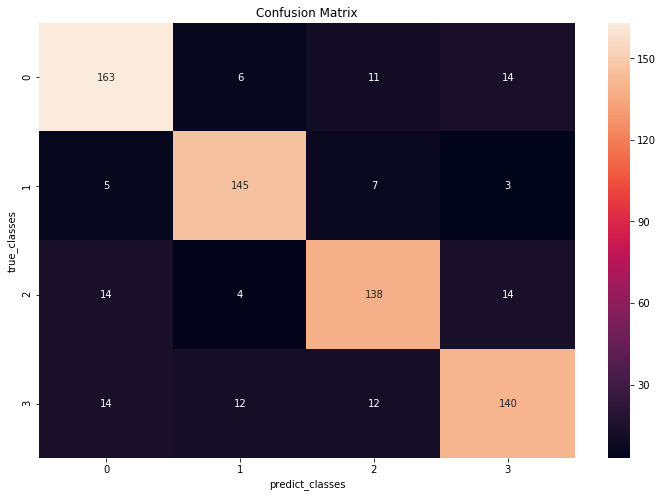

スポーツ : 0
IT           : 1
映画       : 2
ライフ     : 3
処理時間：1.070148229598999[s]


,text,true_label,pre_label
0,3A降格の西岡に対する辛辣ジョークが話題,スポーツ,スポーツ
1,CSに向けリハビリ中の松中に中年ファンの心ない暴言,スポーツ,スポーツ
2,DeNA春田真会長、プロ野球参入の理由は「12個しかないアセットを会社で持つ重みがある」,スポーツ,IT
3,SB・内川、ダルに言及 “基準が分からない。何がそんなに違うのか”,スポーツ,スポーツ
4,U-23日本代表・大津が生出演をドタキャン。西岡アナ「今どちらにいらっしゃいます？」,スポーツ,スポーツ
5,WBC監督選考問題、ノムさんが推す人物は？,スポーツ,スポーツ
6,“内容が入ってこない”代表戦、サポーターの拍手喝采はアイスランド選手に!?,スポーツ,スポーツ
7,“史上最低の外国人選手”が母国でツイッター更新、ファンの怒りは増幅,スポーツ,IT
8,“陸上版 大島優子”!? 日本を代表する美女選手=前田愛純が日本一に,スポーツ,スポーツ
9,「11点取れってことか」斎藤佑樹の開幕投手指名に驚きの声,スポーツ,スポーツ


In [5]:
NB(A_index[0], B_index[0], C_index[0], D_index[0], E_index[0], F_index[0])

正解率= 0.8518518518518519
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       180
           1       0.93      0.87      0.90       193
           2       0.85      0.81      0.83       169
           3       0.79      0.83      0.81       160

    accuracy                           0.85       702
   macro avg       0.85      0.85      0.85       702
weighted avg       0.85      0.85      0.85       702



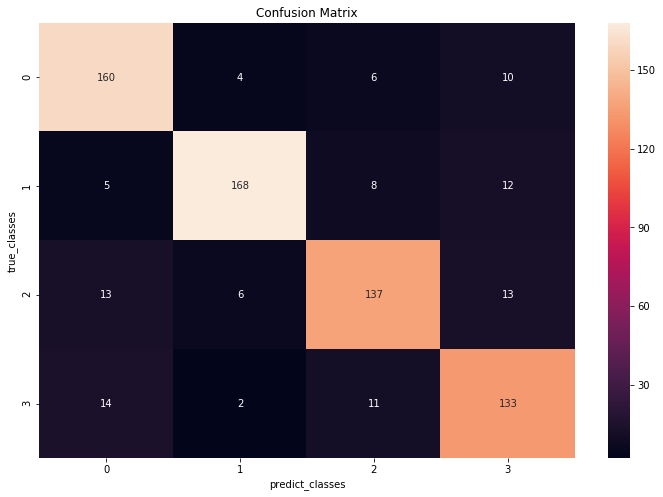

スポーツ : 0
IT           : 1
映画       : 2
ライフ     : 3
処理時間：1.2428019046783447[s]


,text,true_label,pre_label
0,JFA会長の「韓国と共闘」呼びかけに批判殺到,スポーツ,スポーツ
1,K-1ファイトマネー未払い問題に突然の告白「被害は日本人でナンバー2」,スポーツ,スポーツ
2,NHKのサッカー中継で放送事故!?ネットユーザー「これはアウト」,スポーツ,スポーツ
3,U-23日本代表、準決勝に散る。釜本氏は「メキシコは試合巧者」,スポーツ,スポーツ
4,U-23日本代表が大金星、加藤浩次は「選手たちに謝らないといけません」,スポーツ,スポーツ
5,“スーパー女子高生”土井、陸上界の美女アスリート市川＆木村らが意気込み語る,スポーツ,スポーツ
6,“日本の心臓”遠藤保仁の凄すぎるプレー、日本を救った1本のパスとは？,スポーツ,IT
7,“異常な時代”の終焉、レーザーレーサーの今とは,スポーツ,スポーツ
8,「これはひどすぎる」テニスの決勝戦で前代未聞の失格劇,スポーツ,スポーツ
9,「ついにエアオファーか」香川のマンU移籍報道に,スポーツ,スポーツ


In [6]:
NB(A_index[1], B_index[1], C_index[1], D_index[1], E_index[1], F_index[1])

正解率= 0.8062678062678063
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       174
           1       0.81      0.90      0.85       182
           2       0.83      0.81      0.82       168
           3       0.78      0.70      0.74       178

    accuracy                           0.81       702
   macro avg       0.81      0.81      0.80       702
weighted avg       0.81      0.81      0.80       702



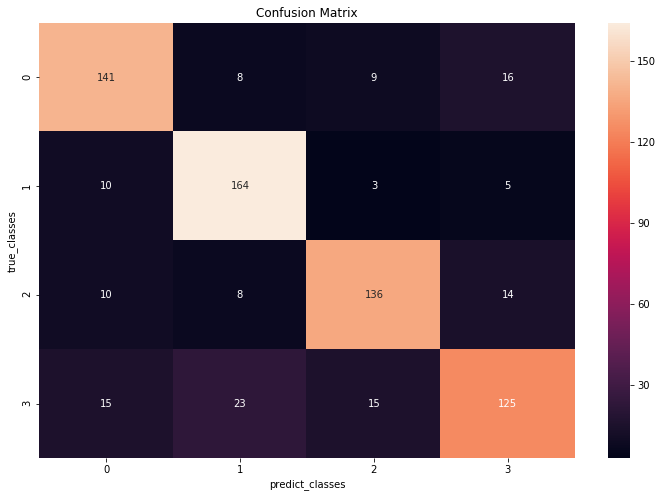

スポーツ : 0
IT           : 1
映画       : 2
ライフ     : 3
処理時間：0.9270529747009277[s]


,text,true_label,pre_label
0,G大阪・呂比須氏の発言に「ダメだこりゃ」の声,スポーツ,スポーツ
1,TBS人気企画「ガチ相撲」、ヒョードルも参戦した第3回大会優勝者は意外な男に・・・,スポーツ,スポーツ
2,W杯直前でスタメン落ちした俊輔に、松田さんが送ったメールとは？,スポーツ,スポーツ
3,“アニキ”金本、新井に厳しいもの言い。ダルにも言及,スポーツ,スポーツ
4,″ご立腹″の松木氏、関塚監督の采配について苦言呈す,スポーツ,スポーツ
5,「MLBで日本人の評価が低下」記事に賛否両論,スポーツ,スポーツ
6,「うどん県」ロゴ採用に「罰ゲームか」の声,スポーツ,IT
7,「これは可愛い」 佐々木希の後継、ブレイク必至の新EUROガール,スポーツ,ライフ
8,「なでしこのように優勝できる」韓国女子監督の発言が話題,スポーツ,スポーツ
9,「まるで中学生」反省文で済ませる浦和フロントに批判殺到,スポーツ,スポーツ


In [7]:
NB(A_index[2], B_index[2], C_index[2], D_index[2], E_index[2], F_index[2])

正解率= 0.8102710413694721
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       177
           1       0.80      0.86      0.83       155
           2       0.82      0.76      0.79       196
           3       0.74      0.79      0.77       173

    accuracy                           0.81       701
   macro avg       0.81      0.81      0.81       701
weighted avg       0.81      0.81      0.81       701



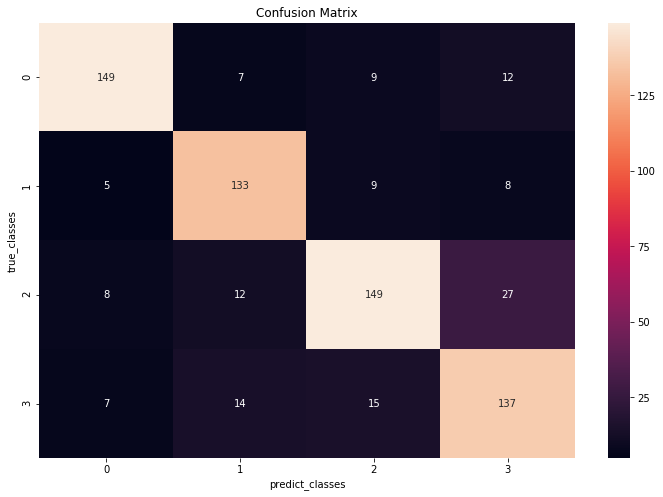

スポーツ : 0
IT           : 1
映画       : 2
ライフ     : 3
処理時間：0.9697892665863037[s]


,text,true_label,pre_label
0,U-23日本代表、まさかのドロー。セルジオ氏は「まるで高校サッカーの決勝」,スポーツ,スポーツ
1,U-23日本代表快勝も、セルジオ越後氏「ロンドン五輪に行ったら恥をかくだけ」,スポーツ,スポーツ
2,“東洋の美女”軍団が東京の空に舞う,スポーツ,映画
3,″完全に老害になった″ミスターに批判殺到,スポーツ,スポーツ
4,「あれで全てが狂った」「誰も信用してない」 中日元監督・落合氏が仰天発言連発!?,スポーツ,スポーツ
5,「もう敗退しやがれ」U-23代表の前倒し招集に,スポーツ,スポーツ
6,「チャンスはある」 ベッカムがロンドン五輪で代表復帰か,スポーツ,ライフ
7,「何度目の急浮上だよ」松井ドジャース移籍の報道に冷めた声,スポーツ,スポーツ
8,「勘違いしすぎ」片岡安祐美の発言に批判の声,スポーツ,スポーツ
9,「妖精・浅尾」に引けを取らない美貌の新パートナーとは？,スポーツ,スポーツ


In [8]:
NB(A_index[3], B_index[3], C_index[3], D_index[3], E_index[3], F_index[3])

正解率= 0.8131241084165478
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       175
           1       0.89      0.87      0.88       180
           2       0.81      0.80      0.80       167
           3       0.74      0.75      0.74       179

    accuracy                           0.81       701
   macro avg       0.81      0.81      0.81       701
weighted avg       0.81      0.81      0.81       701



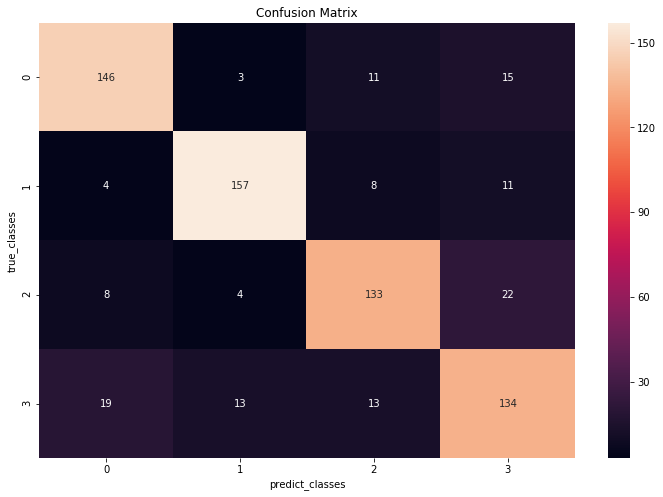

スポーツ : 0
IT           : 1
映画       : 2
ライフ     : 3
処理時間：0.9137780666351318[s]


,text,true_label,pre_label
0,2年目の斎藤佑樹、ブームに沸いた昨季に比べ「気持ち的にはすごい楽」,スポーツ,スポーツ
1,DeNA・中畑監督の“みんながノリがよくなった”改革とは？,スポーツ,スポーツ
2,J歴代6位の年俸から、“見事な右肩下がり”で落ちていった武田修宏,スポーツ,スポーツ
3,“テコンドー界のエリカ様”平成生まれの美少女アスリート＝笠原江梨香に注目集まる,スポーツ,映画
4,“完勝”日本代表にも、北澤氏は「これ普通なんです」,スポーツ,スポーツ
5,“岩崎恭子の再来”、天才美少女スイマーが本日登場！,スポーツ,スポーツ
6,“市民ランナー”川内優輝の母明かす、「今思うとやり過ぎだった」壮絶練習とは,スポーツ,スポーツ
7,「平成のマーメイド」は15歳、最年少の美少女スイマー,スポーツ,スポーツ
8,「格が違う」かわいい子だらけのなでしこ候補たち,スポーツ,スポーツ
9,「長谷部放出」は誤訳？ライターが指摘,スポーツ,スポーツ


In [9]:
NB(A_index[4], B_index[4], C_index[4], D_index[4], E_index[4], F_index[4])